<a href="https://colab.research.google.com/github/AlbertFlorinus/Petrinet/blob/main/nxPetrinet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout
import random
import os

!git clone https://github.com/AlbertFlorinus/Petrinet/
os.chdir('Petrinet')
from nx_petri import Pnet, B, stochastic_iteration, deterministic, colab_simple, colab_plot_detail, bipart_plot, simsims_ex

Cloning into 'Petrinet'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 46 (delta 19), reused 25 (delta 9), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [2]:
def tutorial():
    #how to create a petrinet.
    
    #add_road, add_storage and add_barn are methods creating respective place,
    # start_resource, ie workers for roads etc determine how many the place will contain on creation
    Pnet.add_road("r1", start_workers =2 )
    Pnet.add_storage("s1", start_products = 3)
    Pnet.add_barn("l1", start_food = 2)

    #these are the methods for creating transitions. parameter is the name used, can be integers.
    Pnet.add_house("house_1")
    Pnet.add_farm("farm_1")
    Pnet.add_factory("factory_1")
    Pnet.add_diner("diner_1")

    #For setting up connections, create_edge(u, v) creates a directed edge,

    # aka a resource flows from node u to node v. As in: u -> v
    # Rules:
    # houses can have 1 OR 2 roads to retrieve from, but only 1 outgoing road.
    # houses also need a storage to retrieve from.

    # farms must have 1 and only 1 road to retrieve from, and 1 and only 1 outoing road.
    # farms must have 1 outgoing barn, (for sending food).

    # factory is the same as farm but uses storage instead of barn.

    # diners must have 1 and only 1 road to retrieve from, and 1 and only 1 outoing road.
    # diners must have 1 ingoing barn, (for retrieving food).

    # these rules are only for simulation purposes. Graphing the network should still work fine.

    #example of creating edges (connections) for the house, house_1.
    # this means r1 <-> house_1, s1 -> house_1
    Pnet.create_edge("r1", "house_1")
    Pnet.create_edge("s1", "house_1")
    Pnet.create_edge("house_1", "r1")

In [3]:
#simsims_ex follows the graph layout provided here
# https://bth.instructure.com/courses/3539/pages/simsims

simsims_ex()

In [4]:
#order is a list of the names for transitions that you want to fire
#deterministic(order) will iterate over the list once, firing all transitions in the list in sequence

#order = ["farm_1", "factory_1", "farm_1"]
#deterministic(order)

In [5]:
#randomly select a transition and fire it, integer parameter is amound of iterations.
stochastic_iteration(3)

house_1 fired with 2 workers
factory_1 fired
farm_1 fired

 
 --------
name: amount of tokens
r1: 3  --> r1: 1 
r2: 4  --> r2: 7 
l1: 5  --> l1: 6 
l2: 3  --> l2: 3 
s1: 4  --> s1: 4 


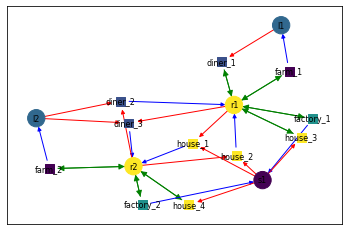

In [6]:
#blue edge : place <- transition
#red edge  : place -> transition
#green edge: place <-> transistion
#squares are transistion, circles places
colab_plot_detail()

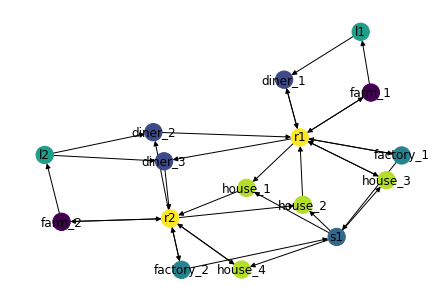

In [7]:
colab_simple()

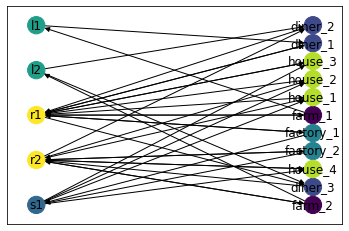

In [10]:
#plot as a bipartite layout (not pretty with larger petrinets)
bipart_plot()